In [246]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import math

sns.set()

%matplotlib inline
print("Imports loaded")

Imports loaded


In [247]:
sns.set()

In [248]:
df = pd.read_csv("Dataset.csv")

In [249]:
df.head()

,Timestamp,Submission,#,Added to
0,12/26/2020 15:43:10,anyone else ruin the magic of their favorite s...,30001.0,NaN
1,12/26/2020 16:09:16,Do we have to wear masks in our own common roo...,30002.0,NaN
2,12/26/2020 16:22:43,hey i'm a frosh and i was just wondering what ...,NaN,30002.0
3,12/26/2020 16:30:48,Does getting a PICS interview request mean any...,30003.0,NaN
4,12/26/2020 17:00:19,I wonder what it would look like to do 6 steps...,30004.0,NaN


In [250]:
df["Year"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).year)
df["Month"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).month)
df["Day"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).day)
df["Hour"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).hour)
df["Minute"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).minute)
df["Second"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).second)
df["WeekYear"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).isocalendar()[1])

In [251]:
df.drop("Timestamp", axis=1, inplace=True)

In [256]:
df["Added to"] = df["Added to"].apply(lambda x: int(x) if not math.isnan(x) else 0)
df["#"] = df["#"].apply(lambda x: int(x) if not math.isnan(x) else 0)
df["Is Question"] = df["Submission"].apply(lambda x: "?" in x)

In [253]:
df.head()

,Submission,#,Added to,Year,Month,Day,Hour,Minute,Second,WeekYear
0,anyone else ruin the magic of their favorite s...,30001,0,2020,12,26,15,43,10,52
1,Do we have to wear masks in our own common roo...,30002,0,2020,12,26,16,9,16,52
2,hey i'm a frosh and i was just wondering what ...,0,30002,2020,12,26,16,22,43,52
3,Does getting a PICS interview request mean any...,30003,0,2020,12,26,16,30,48,52
4,I wonder what it would look like to do 6 steps...,30004,0,2020,12,26,17,0,19,52


In [254]:
df[["Year", "Month", "Day"]].apply(lambda x: x[1], axis=1)

0        12
1        12
2        12
3        12
4        12
         ..
11237     7
11238     7
11239     7
11240     7
11241     7
Length: 11242, dtype: int64

Text(0.5, 1.0, 'Submissions by Hours Since Midnight')

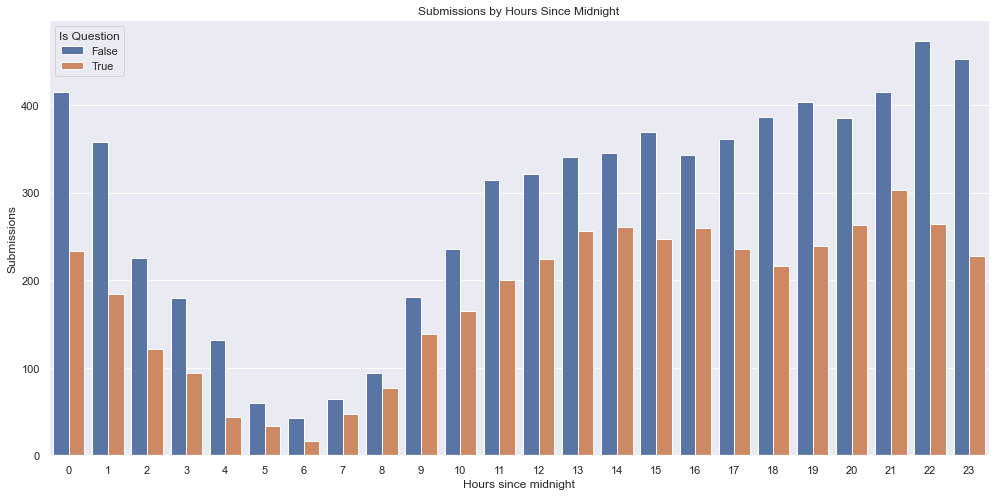

In [257]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="Hour", hue="Is Question")
plt.xlabel("Hours since midnight")
plt.ylabel("Submissions")
plt.title("Submissions by Hours Since Midnight")

Text(0, 0.5, 'Submissions')

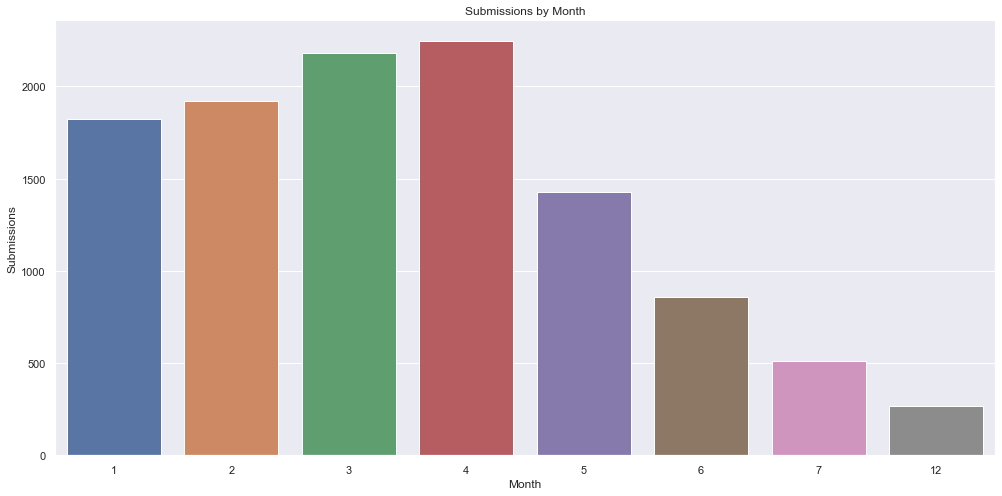

In [237]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="Month")
plt.title("Submissions by Month")
plt.xlabel("Month")
plt.ylabel("Submissions")

Text(0, 0.5, 'Submissions')

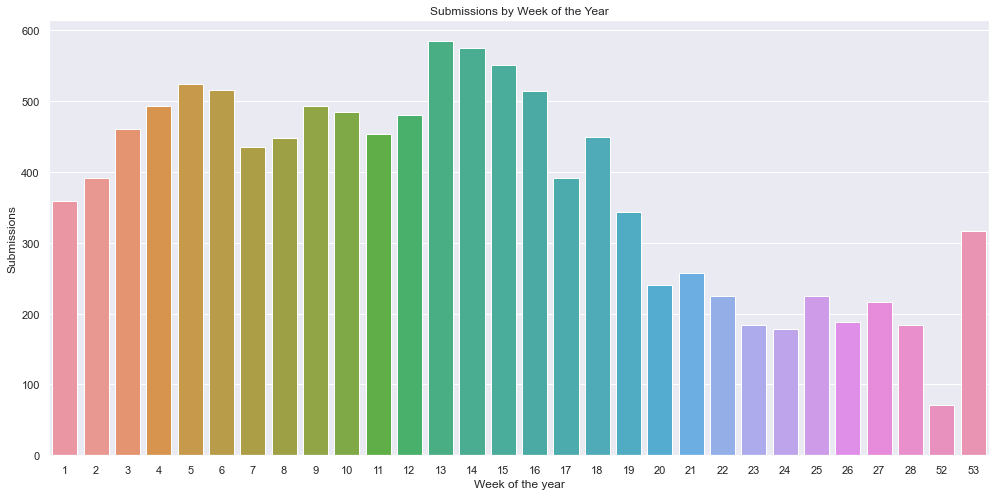

In [238]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="WeekYear")
plt.title("Submissions by Week of the Year")
plt.xlabel("Week of the year")
plt.ylabel("Submissions")

Text(0, 0.5, 'Day of the month')

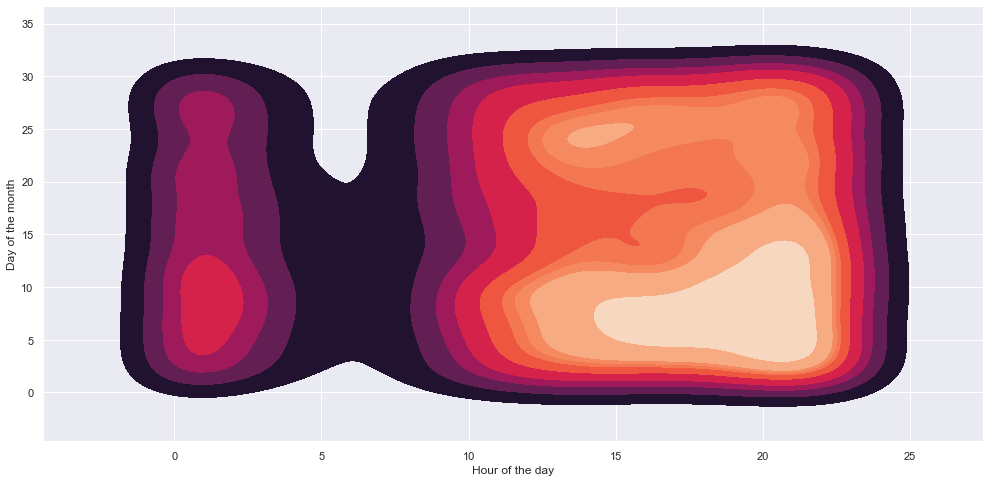

In [268]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x=df["Hour"], y=df["Day"], cmap="rocket", fill=True)
plt.xlabel("Hour of the day")
plt.ylabel("Day of the month")

<AxesSubplot:xlabel='Is Question', ylabel='count'>

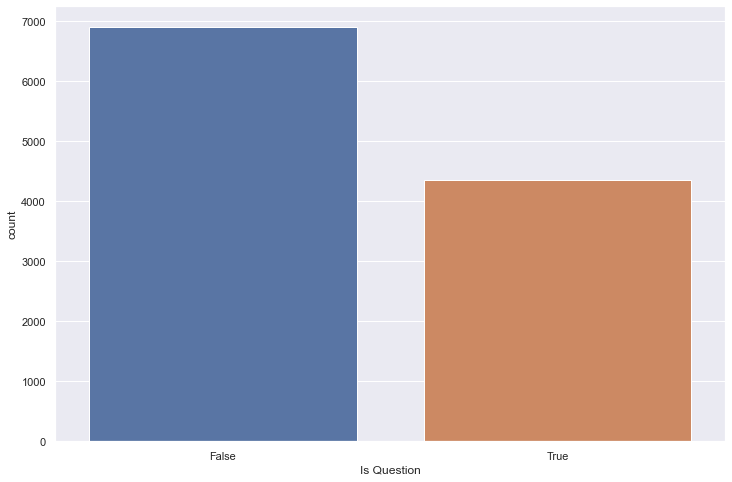

In [187]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Is Question")

In [188]:
df["Question Count"] = df["Submission"].apply(lambda x: x.count("?"))

<AxesSubplot:xlabel='Question Count', ylabel='count'>

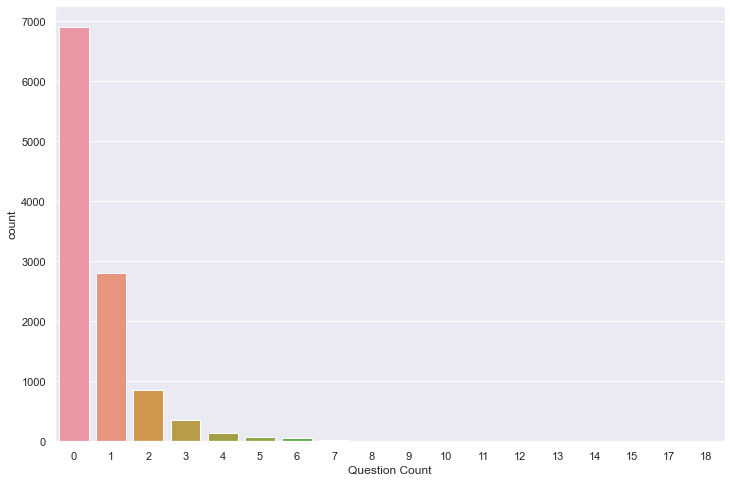

In [189]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Question Count")

In [243]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = [word.lower() for word in list(df[df["WeekYear"] == 5]["Submission"])]

vectorizer = TfidfVectorizer(stop_words=en_stops)
vectorizer.fit_transform(corpus)

sorted(list(zip(vectorizer.get_feature_names(), vectorizer.idf_)), key=lambda e: e[1], reverse=False)[:100]

[('like', 2.709521370991083),
 ('get', 3.043890557415517),
 ('know', 3.058705643200658),
 ('people', 3.2029552520452045),
 ('really', 3.2203469947570738),
 ('anyone', 3.3513752571634776),
 ('want', 3.3513752571634776),
 ('marriage', 3.371577964480997),
 ('pact', 3.371577964480997),
 ('friends', 3.413250660881565),
 ('one', 3.4347568661025285),
 ('much', 3.4792086286733626),
 ('someone', 3.549826195887316),
 ('would', 3.5745188084776873),
 ('feel', 3.6524803499473992),
 ('make', 3.6798793241355137),
 ('even', 3.70805020110221),
 ('campus', 3.7668907011251433),
 ('day', 3.7668907011251433),
 ('got', 3.7668907011251433),
 ('also', 3.797662359791897),
 ('princeton', 3.797662359791897),
 ('please', 3.8622008809294686),
 ('time', 3.8961024326051494),
 ('person', 3.9311937524164198),
 ('good', 4.005301724570142),
 ('love', 4.005301724570142),
 ('go', 4.044522437723423),
 ('first', 4.085344432243678),
 ('could', 4.127904046662474),
 ('else', 4.127904046662474),
 ('need', 4.127904046662474),
 (